<a href="https://colab.research.google.com/github/mdsahilkhan2001/COVID-19_Radiography_Dataset-with-interface/blob/main/COVID_19_Radiography_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"sahilkhanq1","key":"243e283a15591abf8b789ab488c9dfb0"}'}

In [6]:
!mkdir -p ~/.kaggle
!mv kaggle\ \(1\).json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database
!unzip covid19-radiography-database.zip -d covid_dataset


Streaming output truncated to the last 5000 lines.
  inflating: covid_dataset/COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: covid_dataset/COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: covid_dataset/COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: covid_dataset/COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: covid_dataset/COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: covid_dataset/COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: covid_dataset/COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: covid_dataset/COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: covid_dataset/COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: covid_dataset/COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: covid_dataset/COVID-19_Radiography_Dataset/Normal/masks/Normal-7930

In [12]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers

# Base directory for your dataset
base_dir = '/content/covid_dataset/COVID-19_Radiography_Dataset'

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    base_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 33866 images belonging to 4 classes.
Found 8464 images belonging to 4 classes.


In [14]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 546s 508ms/step - accuracy: 0.4906 - loss: 1.1491 - val_accuracy: 0.6001 - val_loss: 0.9077
Epoch 2/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 533s 503ms/step - accuracy: 0.5567 - loss: 1.0088 - val_accuracy: 0.6801 - val_loss: 0.8059
Epoch 3/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 530s 501ms/step - accuracy: 0.5791 - loss: 0.9619 - val_accuracy: 0.6835 - val_loss: 0.7634
Epoch 4/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 541s 511ms/step - accuracy: 0.5958 - loss: 0.9270 - val_accuracy: 0.6847 - val_loss: 0.7446
Epoch 5/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 556s 505ms/step - accuracy: 0.6020 - loss: 0.9154 - val_accuracy: 0.6836 - val_loss: 0.7460
Epoch 6/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 536s 507ms/step - accuracy: 0.6111 - loss: 0.8935 - val_accuracy: 0.7013 - val_loss: 0.6989
Epoch 7/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 586s 554ms/step - accuracy: 0.6259 - loss: 0.8738 - val_accuracy: 0.7068 - val_loss: 0.6708
Epoch 8/10
1059/1059 ━━━━━━━━━━━━━━━━━━━━ 570s 538ms/step - ac

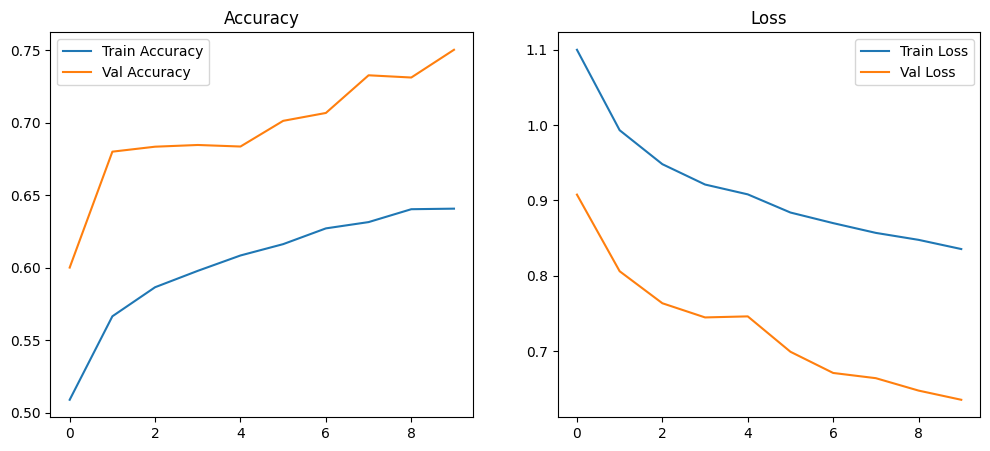

In [16]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Replace with your actual class names
class_names = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']


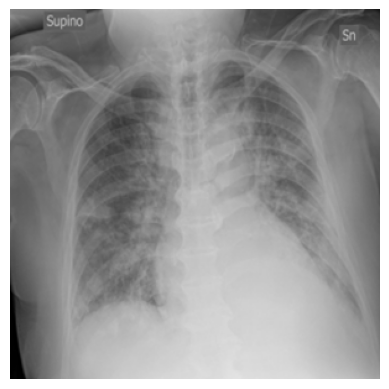

In [19]:
# 1. Load and preview
# Update the image path to an existing image in your dataset
img_path = '/content/covid_dataset/COVID-19_Radiography_Dataset/COVID/images/COVID-10.png'
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

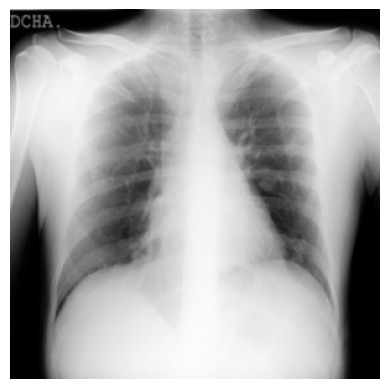

In [21]:
# 1. Load and preview
# Update the image path to an existing image in your dataset
img_path = '/content/covid_dataset/COVID-19_Radiography_Dataset/COVID/images/COVID-1000.png'
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

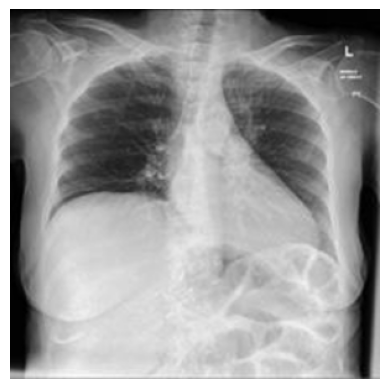

In [22]:
#/content/covid_dataset/COVID-19_Radiography_Dataset/COVID/images/COVID-1175.
# 1. Load and preview
# Update the image path to an existing image in your dataset
img_path = '/content/covid_dataset/COVID-19_Radiography_Dataset/COVID/images/COVID-1175.png'
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

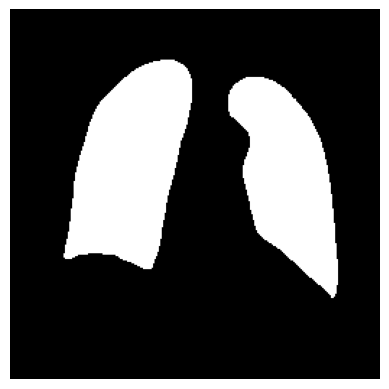

In [23]:
img_path = '/content/covid_dataset/COVID-19_Radiography_Dataset/COVID/masks/COVID-1.png'
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

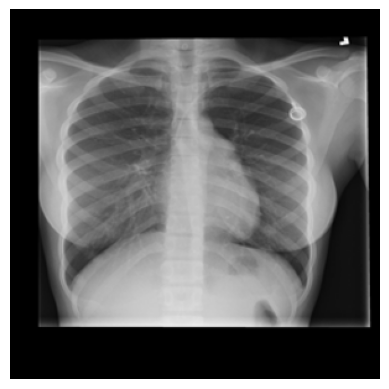

In [24]:
img_path = '/content/covid_dataset/COVID-19_Radiography_Dataset/Normal/images/Normal-1.png'
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [25]:
img_resized = cv2.resize(img, (224, 224))
test_input = img_resized.astype('float32') / 255.0
test_input = np.expand_dims(test_input, axis=0)

In [26]:
pred = model.predict(test_input)
predicted_class = class_names[np.argmax(pred)]
print("Predicted Class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Normal


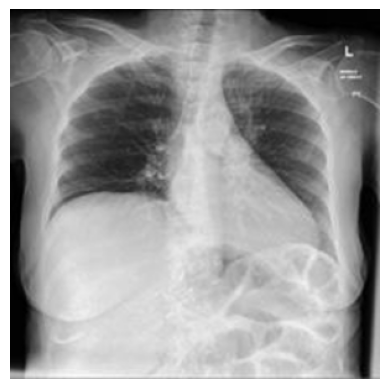

In [27]:
#/content/covid_dataset/COVID-19_Radiography_Dataset/COVID/images/COVID-1175.
# 1. Load and preview
# Update the image path to an existing image in your dataset
img_path = '/content/covid_dataset/COVID-19_Radiography_Dataset/COVID/images/COVID-1175.png'
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [28]:
pred = model.predict(test_input)
predicted_class = class_names[np.argmax(pred)]
print("Predicted Class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Class: Normal


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
# 2. Resize and normalize
img_resized = cv2.resize(img, (224, 224))
test_input = img_resized.astype('float32') / 255.0
test_input = np.expand_dims(test_input, axis=0)

In [31]:

# 3. Predict
pred = model.predict(test_input)
predicted_class = class_names[np.argmax(pred)]
print("Predicted Class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Class: Normal


In [32]:
# Install if needed (generally pre-installed)
!pip install ipywidgets --quiet

import ipywidgets as widgets
from IPython.display import display, clear_output
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

# Define widget components
uploader = widgets.FileUpload(accept='image/*', multiple=False)
predict_btn = widgets.Button(description="Predict")
output = widgets.Output()

# Display widgets
display(uploader, predict_btn, output)

def on_click(b):
    with output:
        clear_output()
        if uploader.value:
            file_info = next(iter(uploader.value.values()))
            img_bytes = file_info['content']
            img = Image.open(io.BytesIO(img_bytes)).convert('RGB')
            img = img.resize((224,224))
            img_array = np.array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)
            pred = model.predict(img_array)
            label = class_names[np.argmax(pred)]
            display(img)
            print(f"Predicted: {label}")

predict_btn.on_click(on_click)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.8 MB/s eta 0:00:00


FileUpload(value={}, accept='image/*', description='Upload')

Button(description='Predict', style=ButtonStyle())

Output()

In [33]:
# Install if needed (generally pre-installed)
!pip install ipywidgets --quiet

import io
import ipywidgets as widgets
from IPython.display import display, clear_output
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

# Define widget components
uploader = widgets.FileUpload(accept='image/*', multiple=False)
predict_btn = widgets.Button(description="Predict")
output = widgets.Output()

# Display widgets
display(uploader, predict_btn, output)

def on_click(b):
    with output:
        clear_output()
        if uploader.value:
            file_info = next(iter(uploader.value.values()))
            img_bytes = file_info['content']
            img = Image.open(io.BytesIO(img_bytes)).convert('RGB')
            img = img.resize((224,224))
            img_array = np.array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            pred = model.predict(img_array)
            label = class_names[np.argmax(pred)]

            display(img)
            print(f"Predicted: {label}")

predict_btn.on_click(on_click)


FileUpload(value={}, accept='image/*', description='Upload')

Button(description='Predict', style=ButtonStyle())

Output()

In [34]:
import gradio as gr
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model("covid_cnn_model.h5")

# Image size (match training)
IMG_SIZE = 128   # or 224 if your model was trained on 224x224

# Define class names
class_names = ["COVID", "Normal", "Lung_Opacity", "Viral Pneumonia"]

def predict_covid(image):
    # Convert to RGB (safety if webcam gives BGR)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Resize
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
    # Expand dims for model input
    img = np.expand_dims(img, axis=0)

    preds = model.predict(img)[0]
    label = class_names[np.argmax(preds)]
    confidence = float(np.max(preds))

    return {class_names[i]: float(preds[i]) for i in range(len(class_names))}, f"Prediction: {label} (Confidence: {confidence:.2f})"

# Gradio UI
demo = gr.Interface(
    fn=predict_covid,
    inputs=gr.Image(type="numpy", sources=["upload", "webcam"], label="Upload or Capture Chest X-ray"),
    outputs=[gr.Label(num_top_classes=4, label="Class Probabilities"),
             gr.Textbox(label="Final Prediction")],
    title="🩻 COVID-19 Detection from Chest X-rays",
    description="Upload a chest X-ray or capture from webcam. The model predicts COVID, Normal, Lung Opacity, or Viral Pneumonia."
)

# Launch with public URL
demo.launch(share=True)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'covid_cnn_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [35]:
model.save("covid_cnn_model.h5")


In [36]:
from tensorflow.keras.models import load_model
model = load_model("covid_cnn_model.h5")


In [37]:
model.save("covid_cnn_model.keras")   # new format


In [38]:
model.save("covid_cnn_model.keras")


In [39]:
model = load_model("covid_cnn_model.keras")


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [42]:
def predict_with_gradcam(image):
    """
    image: numpy RGB image from gradio (H,W,3), uint8
    returns: (probs_dict, final_text, overlay_image)
    """
    # Keep a copy of the original (resized) for visualization
    orig_resized = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    input_arr = preprocess_for_model(image)

    # Predict
    preds = model.predict(input_arr)[0]
    pred_index = int(np.argmax(preds))
    label = class_names[pred_index]
    confidence = float(preds[pred_index])

    # Grad-CAM heatmap
    try:
        heatmap = make_gradcam_heatmap(input_arr, model, last_conv_layer_name, pred_index)
        overlay = overlay_heatmap_on_image(orig_resized, heatmap, alpha=0.5)
    except Exception as e:
        print("Grad-CAM failed:", e)
        overlay = orig_resized

    probs = {class_names[i]: float(preds[i]) for i in range(len(class_names))}
    final_text = f"{label} (Confidence: {confidence:.3f})"

    return probs, final_text, overlay


In [44]:
print("Model input shape:", model.input_shape)


Model input shape: (None, 224, 224, 3)


In [45]:
IMG_SIZE = 224   # must match your model


In [46]:
def preprocess_for_model(image_np):
    # Already RGB from Gradio
    img = cv2.resize(image_np, (IMG_SIZE, IMG_SIZE))   # 224x224
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)   # shape (1, 224, 224, 3)
    return img


In [47]:
MODEL_PATH = "/content/covid_cnn_model.keras"
IMG_SIZE = 224
class_names = ["COVID", "Normal", "Lung_Opacity", "Viral Pneumonia"]

model = load_model(MODEL_PATH, compile=False)

def preprocess_for_model(image_np):
    img = cv2.resize(image_np, (IMG_SIZE, IMG_SIZE))
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)
    return img


In [48]:
# Install required packages
!pip install gradio --quiet opencv-python --quiet

import gradio as gr
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model

# ==============================
# CONFIG
# ==============================
MODEL_PATH = "/content/covid_cnn_model.keras"   # or .h5 if that's what you saved
IMG_SIZE = 224   # match your model input
class_names = ["COVID", "Normal", "Lung_Opacity", "Viral Pneumonia"]

# ==============================
# Load model
# ==============================
model = load_model(MODEL_PATH, compile=False)

def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model!")

last_conv_layer_name = find_last_conv_layer(model)
print("Using last conv layer:", last_conv_layer_name)

# ==============================
# Grad-CAM functions
# ==============================
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)
    heatmap = cv2.resize(heatmap.numpy(), (IMG_SIZE, IMG_SIZE))
    return heatmap

def overlay_heatmap_on_image(original_img, heatmap, alpha=0.4, colormap=cv2.COLORMAP_JET):
    heatmap_uint8 = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, colormap)
    heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)
    overlay = original_img.astype(np.float32) * (1 - alpha) + heatmap_color.astype(np.float32) * alpha
    return np.clip(overlay, 0, 255).astype(np.uint8)

def preprocess_for_model(image_np):
    img = cv2.resize(image_np, (IMG_SIZE, IMG_SIZE))   # 224x224
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)   # shape (1, 224, 224, 3)
    return img

# ==============================
# Prediction + Grad-CAM
# ==============================
def predict_with_gradcam(image):
    orig_resized = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    input_arr = preprocess_for_model(image)

    preds = model.predict(input_arr)[0]
    pred_index = int(np.argmax(preds))
    label = class_names[pred_index]
    confidence = float(preds[pred_index])

    try:
        heatmap = make_gradcam_heatmap(input_arr, model, last_conv_layer_name, pred_index)
        overlay = overlay_heatmap_on_image(orig_resized, heatmap, alpha=0.5)
    except Exception as e:
        print("Grad-CAM failed:", e)
        overlay = orig_resized

    probs = {class_names[i]: float(preds[i]) for i in range(len(class_names))}
    final_text = f"{label} (Confidence: {confidence:.3f})"
    return probs, final_text, overlay

# ==============================
# Gradio UI
# ==============================
demo = gr.Interface(
    fn=predict_with_gradcam,
    inputs=gr.Image(type="numpy", sources=["upload", "webcam"], label="Upload or Capture Chest X-ray"),
    outputs=[
        gr.Label(num_top_classes=4, label="Class Probabilities"),
        gr.Textbox(label="Final Prediction"),
        gr.Image(type="numpy", label="Grad-CAM Overlay")
    ],
    title="🩻 COVID-19 Detection with Grad-CAM",
    description="Upload an X-ray (or use webcam). Shows class probabilities and a Grad-CAM heatmap overlay explaining model decision."
)

demo.launch(share=True)


Using last conv layer: conv2d_2
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b27e743b25b1dd0a13.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [49]:
# Install required packages
!pip install gradio --quiet opencv-python --quiet

import gradio as gr
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model

# ==============================
# CONFIG
# ==============================
MODEL_PATH = "/content/covid_cnn_model.keras"   # or .h5 if that's what you saved
IMG_SIZE = 224   # match your model input
class_names = ["COVID", "Normal", "Lung_Opacity", "Viral Pneumonia"]

# ==============================
# Load model
# ==============================
model = load_model(MODEL_PATH, compile=False)

def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model!")

last_conv_layer_name = find_last_conv_layer(model)
print("Using last conv layer:", last_conv_layer_name)

# ==============================
# Grad-CAM functions
# ==============================
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)
    heatmap = cv2.resize(heatmap.numpy(), (IMG_SIZE, IMG_SIZE))
    return heatmap

def overlay_heatmap_on_image(original_img, heatmap, alpha=0.4, colormap=cv2.COLORMAP_JET):
    heatmap_uint8 = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, colormap)
    heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)
    overlay = original_img.astype(np.float32) * (1 - alpha) + heatmap_color.astype(np.float32) * alpha
    return np.clip(overlay, 0, 255).astype(np.uint8)

def preprocess_for_model(image_np):
    img = cv2.resize(image_np, (IMG_SIZE, IMG_SIZE))   # 224x224
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)   # shape (1, 224, 224, 3)
    return img

# ==============================
# Prediction + Grad-CAM
# ==============================
def predict_with_gradcam(image, show_heatmap):
    orig_resized = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    input_arr = preprocess_for_model(image)

    preds = model.predict(input_arr)[0]
    pred_index = int(np.argmax(preds))
    label = class_names[pred_index]
    confidence = float(preds[pred_index])

    overlay = orig_resized
    if show_heatmap:
        try:
            heatmap = make_gradcam_heatmap(input_arr, model, last_conv_layer_name, pred_index)
            overlay = overlay_heatmap_on_image(orig_resized, heatmap, alpha=0.5)
        except Exception as e:
            print("Grad-CAM failed:", e)

    probs = {class_names[i]: float(preds[i]) for i in range(len(class_names))}
    final_text = f"{label} (Confidence: {confidence:.3f})"
    return probs, final_text, overlay

# ==============================
# Gradio UI
# ==============================
demo = gr.Interface(
    fn=predict_with_gradcam,
    inputs=[
        gr.Image(type="numpy", sources=["upload", "webcam"], label="Upload or Capture Chest X-ray"),
        gr.Checkbox(label="Show Grad-CAM Heatmap?", value=True)  # toggle button
    ],
    outputs=[
        gr.Label(num_top_classes=4, label="Class Probabilities"),
        gr.Textbox(label="Final Prediction"),
        gr.Image(type="numpy", label="X-ray / Heatmap Overlay")
    ],
    title="🩻 COVID-19 Detection with Grad-CAM",
    description="Upload an X-ray (or use webcam). Toggle heatmap ON/OFF to see where the model is focusing."
)

demo.launch(share=True)


Using last conv layer: conv2d_2
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://47dea9937090d19192.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [50]:
# Install required packages
!pip install gradio --quiet opencv-python --quiet

import gradio as gr
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
import tempfile
import os

# ==============================
# CONFIG
# ==============================
MODEL_PATH = "/content/covid_cnn_model.keras"   # or .h5 if that's what you saved
IMG_SIZE = 224   # match your model input
class_names = ["COVID", "Normal", "Lung_Opacity", "Viral Pneumonia"]

# ==============================
# Load model
# ==============================
model = load_model(MODEL_PATH, compile=False)

def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model!")

last_conv_layer_name = find_last_conv_layer(model)
print("Using last conv layer:", last_conv_layer_name)

# ==============================
# Grad-CAM functions
# ==============================
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-8)
    heatmap = cv2.resize(heatmap.numpy(), (IMG_SIZE, IMG_SIZE))
    return heatmap

def overlay_heatmap_on_image(original_img, heatmap, alpha=0.4, colormap=cv2.COLORMAP_JET):
    heatmap_uint8 = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, colormap)
    heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)
    overlay = original_img.astype(np.float32) * (1 - alpha) + heatmap_color.astype(np.float32) * alpha
    return np.clip(overlay, 0, 255).astype(np.uint8)

def preprocess_for_model(image_np):
    img = cv2.resize(image_np, (IMG_SIZE, IMG_SIZE))   # 224x224
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)   # shape (1, 224, 224, 3)
    return img

# ==============================
# Prediction + Grad-CAM + Download
# ==============================
def predict_with_gradcam(image, show_heatmap):
    orig_resized = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    input_arr = preprocess_for_model(image)

    preds = model.predict(input_arr)[0]
    pred_index = int(np.argmax(preds))
    label = class_names[pred_index]
    confidence = float(preds[pred_index])

    overlay = orig_resized
    if show_heatmap:
        try:
            heatmap = make_gradcam_heatmap(input_arr, model, last_conv_layer_name, pred_index)
            overlay = overlay_heatmap_on_image(orig_resized, heatmap, alpha=0.5)
        except Exception as e:
            print("Grad-CAM failed:", e)

    probs = {class_names[i]: float(preds[i]) for i in range(len(class_names))}
    final_text = f"{label} (Confidence: {confidence:.3f})"

    # Save overlay to a temporary file for download
    tmp_file = tempfile.NamedTemporaryFile(delete=False, suffix=".png")
    cv2.imwrite(tmp_file.name, cv2.cvtColor(overlay, cv2.COLOR_RGB2BGR))

    return probs, final_text, overlay, tmp_file.name

# ==============================
# Gradio UI
# ==============================
demo = gr.Interface(
    fn=predict_with_gradcam,
    inputs=[
        gr.Image(type="numpy", sources=["upload", "webcam"], label="Upload or Capture Chest X-ray"),
        gr.Checkbox(label="Show Grad-CAM Heatmap?", value=True)
    ],
    outputs=[
        gr.Label(num_top_classes=4, label="Class Probabilities"),
        gr.Textbox(label="Final Prediction"),
        gr.Image(type="numpy", label="X-ray / Heatmap Overlay"),
        gr.File(label="Download Overlay Image")  # download button
    ],
    title="🩻 COVID-19 Detection with Grad-CAM",
    description="Upload an X-ray (or use webcam). Toggle heatmap ON/OFF and download the result."
)

demo.launch(share=True)


Using last conv layer: conv2d_2
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://08c3d27b40095b8f09.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
